<a href="https://colab.research.google.com/github/Mahmood-Anaam/Artificial-Intelligence/blob/main/Stock_Price_Forecasting_Using_ARIMA_A_Case_Study_on_Saudi_Chemical_Co.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Forecasting Using ARIMA: A Case Study on Saudi Chemical Co.




---



## 1. Introduction



Stock price prediction is an essential task in the financial industry, helping investors and stakeholders make informed decisions. This project focuses on forecasting the closing prices of Saudi Chemical Co.'s stock within the Health Care sector, leveraging the ARIMA (Autoregressive Integrated Moving Average) model, a powerful statistical method for time-series forecasting.

The dataset spans from April 23, 2015, to April 23, 2020, and includes daily stock price data. Key features include:
- Opening, high, low, and closing prices.
- Trading volume, which reflects market activity.

The objective of this analysis is to develop a robust forecasting model capable of capturing the underlying trends in stock prices. To achieve this, the project follows a structured methodology:
1. **Data Loading and Exploration**: The dataset is loaded and inspected to understand its structure and identify any missing or inconsistent values.
2. **Data Cleaning and Preprocessing**: The data is prepared for analysis, including feature selection and ensuring chronological order.
3. **Exploratory Data Analysis (EDA)**: Trends, patterns, and relationships within the data are visualized and analyzed to gain insights.
4. **Feature Engineering**: Lag features and rolling statistics are generated to enhance the model's ability to predict future values.
5. **Model Selection and Training**: The ARIMA model is trained using the training dataset, with parameters selected based on ACF and PACF plots.
6. **Model Evaluation and Visualization**: The model's predictions are evaluated against actual values using metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). The predictions are visualized to assess the model's performance.
7. **Conclusion**: Key findings are summarized, and recommendations for future improvements are discussed.

This project aims to provide a baseline model for stock price forecasting and highlight potential areas for improvement through advanced techniques or additional features. The ARIMA model serves as a starting point for analyzing historical stock price trends and making future predictions.




---



**Import necessary libraries**

In [1]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error


import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({
    'figure.figsize': (12, 6),
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'axes.grid': True,
    'grid.alpha': 0.5,
    'lines.linewidth': 2,
    'axes.prop_cycle': plt.cycler(color=[
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
        '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
        '#bcbd22', '#17becf'])
})

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Data Loading and Exploration







This section involves importing the dataset and exploring its structure to gain an initial understanding of the data. We will:
- Inspect the dataset's size and columns.
- Check for missing values.
- Review basic statistics for numerical columns.

In [3]:
# Load the dataset
file_path = '/content/drive/MyDrive/Tadawul_stocks_2015_2020_healthcare_chemical.xlsx'
df = pd.read_excel(file_path)
# Display the first few rows of the dataset
df.head()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2230,Saudi Chemical Co.,CHEMICAL,Health Care,2020-04-23,20.20,20.32,20.10,20.26,0.18,0.9,143513,2901881.90,217
1,2230,Saudi Chemical Co.,CHEMICAL,Health Care,2020-04-22,20.00,20.20,19.90,20.08,-0.02,-0.1,141946,2844852.62,248
2,2230,Saudi Chemical Co.,CHEMICAL,Health Care,2020-04-21,19.52,20.12,19.52,20.10,0.02,0.1,213748,4264043.88,314
3,2230,Saudi Chemical Co.,CHEMICAL,Health Care,2020-04-20,20.00,20.08,19.76,20.08,0.04,0.2,179167,3565769.64,278
4,2230,Saudi Chemical Co.,CHEMICAL,Health Care,2020-04-19,20.08,20.08,19.88,20.04,0.04,0.2,174640,3491127.18,303


In [4]:
# Check the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   symbol         1252 non-null   int64         
 1   name           1252 non-null   object        
 2   trading_name   1252 non-null   object        
 3   sectoer        1252 non-null   object        
 4   date           1252 non-null   datetime64[ns]
 5   open           1252 non-null   float64       
 6   high           1252 non-null   float64       
 7   low            1252 non-null   float64       
 8   close          1252 non-null   float64       
 9   change         1252 non-null   float64       
 10  perc_Change    1252 non-null   float64       
 11  volume_traded  1252 non-null   int64         
 12  value_traded   1252 non-null   float64       
 13  no_trades      1252 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(3), object(3)
memory usage: 137.

In [5]:
print("Missing values per column:\n")
df.isnull().sum().rename_axis('column').reset_index(name='Missing values')

Missing values per column:



,column,Missing values
0,symbol,0
1,name,0
2,trading_name,0
3,sectoer,0
4,date,0
5,open,0
6,high,0
7,low,0
8,close,0
9,change,0


In [6]:
# Display summary statistics for numerical columns
df.describe()

,symbol,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
count,1252.0,1252,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1.252000e+03,1.252000e+03,1252.000000
mean,2230.0,2017-10-25 06:51:45.431309824,29.647556,29.969760,29.298690,29.619952,-0.027212,-0.062859,2.272286e+05,7.695678e+06,229.742013
min,2230.0,2015-04-23 00:00:00,19.300000,20.060000,19.300000,19.600000,-4.400000,-9.840000,8.409000e+03,1.959230e+05,13.000000
25%,2230.0,2016-07-24 18:00:00,24.037500,24.275000,23.920000,24.065000,-0.230000,-0.822500,7.403400e+04,1.878833e+06,100.750000
50%,2230.0,2017-10-29 12:00:00,25.420000,25.665000,25.190000,25.415000,0.000000,0.000000,1.453415e+05,3.931936e+06,168.000000
75%,2230.0,2019-01-27 06:00:00,32.020000,32.187500,31.720000,31.932500,0.210000,0.730000,2.741642e+05,8.666874e+06,287.000000
max,2230.0,2020-04-23 00:00:00,63.170000,63.360000,61.110000,62.870000,4.320000,9.970000,5.773431e+06,1.845776e+08,3260.000000
std,0.0,NaN,9.334085,9.503582,9.124901,9.308982,0.613434,1.782716,2.905789e+05,1.236796e+07,210.725179


## 3. Data Cleaning and Preprocessing



This section involves cleaning and preparing the dataset for analysis. Key steps include:
1. Converting the `date` column to a datetime format and setting it as the index.
2. Selecting the relevant columns for analysis.
3. Sorting the data by date to ensure proper chronological order.




### Convert `date` Column to Datetime and Set as Index
The `date` column is converted to a datetime format to facilitate time-series analysis. Additionally, it is set as the index for easier manipulation.


In [7]:
# Convert 'date' column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Display the first few rows to verify changes
df.head()

,symbol,name,trading_name,sectoer,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
date,,,,,,,,,,,,,
2020-04-23,2230,Saudi Chemical Co.,CHEMICAL,Health Care,20.20,20.32,20.10,20.26,0.18,0.9,143513,2901881.90,217
2020-04-22,2230,Saudi Chemical Co.,CHEMICAL,Health Care,20.00,20.20,19.90,20.08,-0.02,-0.1,141946,2844852.62,248
2020-04-21,2230,Saudi Chemical Co.,CHEMICAL,Health Care,19.52,20.12,19.52,20.10,0.02,0.1,213748,4264043.88,314
2020-04-20,2230,Saudi Chemical Co.,CHEMICAL,Health Care,20.00,20.08,19.76,20.08,0.04,0.2,179167,3565769.64,278
2020-04-19,2230,Saudi Chemical Co.,CHEMICAL,Health Care,20.08,20.08,19.88,20.04,0.04,0.2,174640,3491127.18,303


### Select Relevant Columns

From the dataset, we select only the key columns necessary for analysis:

`open`, `high`, `low`, `close`, `volume_traded`

In [8]:
# Select relevant columns
columns_to_keep = ['open', 'high', 'low', 'close', 'volume_traded']
df = df[columns_to_keep]

# Display the cleaned dataset
df.head()

,open,high,low,close,volume_traded
date,,,,,
2020-04-23,20.20,20.32,20.10,20.26,143513
2020-04-22,20.00,20.20,19.90,20.08,141946
2020-04-21,19.52,20.12,19.52,20.10,213748
2020-04-20,20.00,20.08,19.76,20.08,179167
2020-04-19,20.08,20.08,19.88,20.04,174640


### Sort the Data by Date

We ensure the dataset is sorted in ascending order of dates to maintain the chronological sequence required for time-series analysis.

In [9]:
# Sort the data by date
df.sort_index(inplace=True)

# Verify sorting
df.head()

,open,high,low,close,volume_traded
date,,,,,
2015-04-23,54.17,55.48,53.80,55.34,513049
2015-04-26,55.48,57.92,55.48,57.65,1104660
2015-04-27,58.11,58.86,56.98,57.12,969336
2015-04-28,56.98,57.36,56.23,56.71,577918
2015-04-29,57.73,57.92,56.23,56.65,614497


## 4. Exploratory Data Analysis (EDA)




This section involves visualizing and analyzing the data to uncover patterns, trends, and relationships. Key objectives include:
1. Visualizing the trends in stock prices over time.
2. Understanding the trading volume behavior.
3. Examining correlations between the variables.

### Closing Price Over Time


We plot the closing price over the entire period to identify trends and fluctuations.

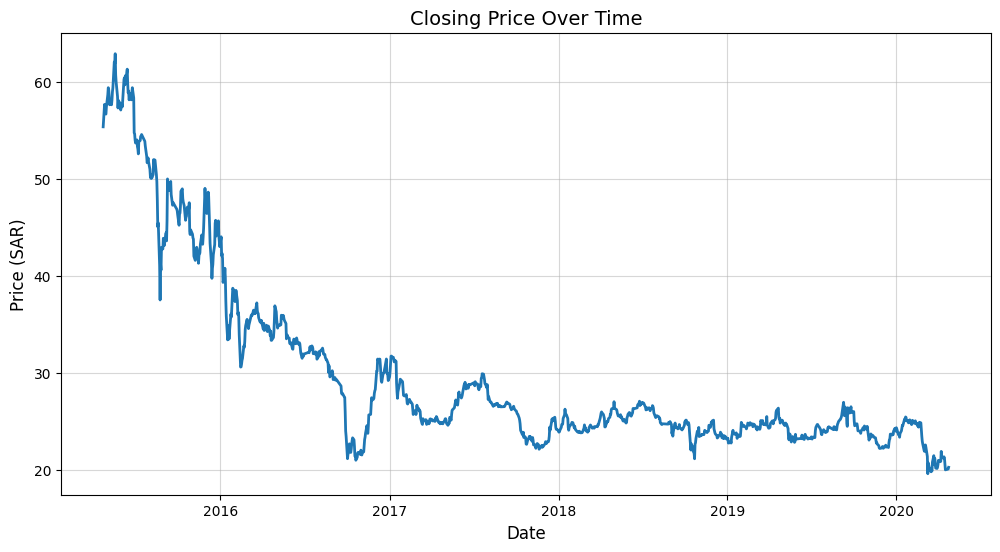

In [10]:
# Plot closing prices over time
plt.plot(df.index, df['close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (SAR)')
plt.show()

- The closing price shows a sharp decline from **2015 to 2016**, stabilizing somewhat in later years.
- Between **2017 and 2020**, the stock exhibited lower volatility, with prices fluctuating around the SAR 20–30 range.
- The overall trend suggests a significant decrease in stock value over the observed period, highlighting a challenging performance phase for the company.


### Trading Volume Over Time

We analyze how the trading volume changes over the period.

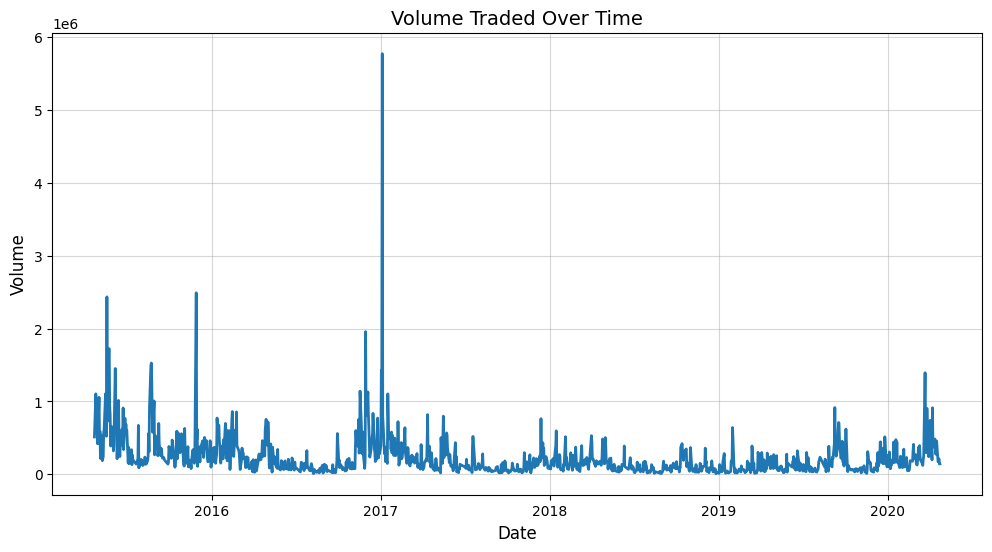

In [11]:
# Plot volume traded over time
plt.plot(df.index, df['volume_traded'])
plt.title('Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

- Trading volume is relatively stable for most of the period but exhibits **significant spikes**, notably in **2016 and early 2017**.
- The spike in trading activity around 2017 could indicate market events, such as earnings announcements, mergers, or external economic factors impacting investor behavior.
- These peaks suggest increased interest or concern from investors during specific periods.

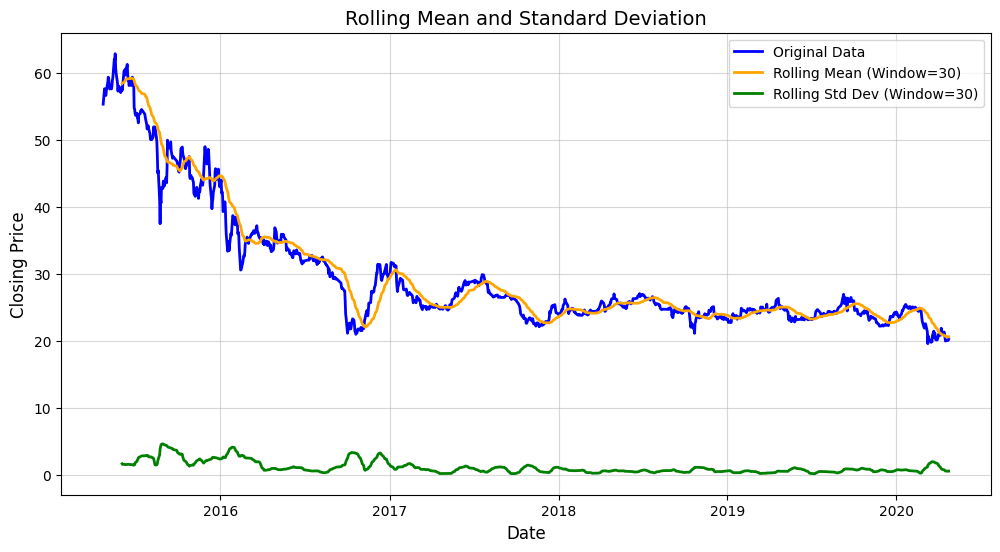

In [12]:
# Calculate rolling mean and standard deviation
rolling_mean = df['close'].rolling(window=30).mean()
rolling_std = df['close'].rolling(window=30).std()

# Plot rolling statistics
plt.plot(df['close'], label="Original Data", color='blue')
plt.plot(rolling_mean, label="Rolling Mean (Window=30)", color='orange')
plt.plot(rolling_std, label="Rolling Std Dev (Window=30)", color='green')
plt.title("Rolling Mean and Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

### Correlation Analysis

We calculate and visualize the correlations between numerical variables to understand their relationships.

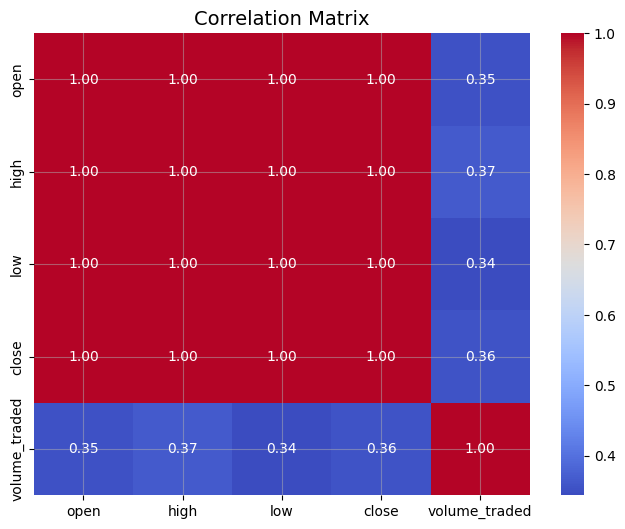

In [13]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


- **Strong correlations**:
  - `open`, `high`, `low`, and `close` prices are strongly positively correlated (correlation ~1.00), which is expected as these prices are derived from the same stock during the trading day.
- **Weaker correlations**:
  - `volume_traded` has a weaker correlation (~0.35–0.37) with price variables. This suggests that while trading activity influences prices, other factors such as market sentiment or economic conditions play a significant role in determining stock value.

## 5. Feature Engineering





In this section, we enhance the dataset by adding new features to capture historical and rolling trends in stock prices. These features help the model better understand temporal dependencies in the data. The steps include:
1. Adding lag features to incorporate past price information.
2. Computing rolling statistics to capture trends over a moving window.


### Add Lag Features

Lag features represent the closing prices of previous days. These features help the model recognize the impact of recent price trends.


In [14]:
# Add lag features for the 'close' price
df['close_lag_1'] = df['close'].shift(1)  # 1-day lag
df['close_lag_2'] = df['close'].shift(2)  # 2-day lag

# Display the dataset with new lag features
df[['close', 'close_lag_1', 'close_lag_2']].head()

,close,close_lag_1,close_lag_2
date,,,
2015-04-23,55.34,NaN,NaN
2015-04-26,57.65,55.34,NaN
2015-04-27,57.12,57.65,55.34
2015-04-28,56.71,57.12,57.65
2015-04-29,56.65,56.71,57.12


### Add Rolling Statistics

Rolling statistics, such as moving averages and rolling standard deviations, help capture trends and volatility in stock prices over a specific window.

In [15]:
# Add rolling mean and standard deviation for a 5-day window
df['close_rolling_mean_5'] = df['close'].rolling(window=5).mean()
df['close_rolling_std_5'] = df['close'].rolling(window=5).std()

# Display the dataset with rolling statistics
df[['close', 'close_rolling_mean_5', 'close_rolling_std_5']].head()


,close,close_rolling_mean_5,close_rolling_std_5
date,,,
2015-04-23,55.34,NaN,NaN
2015-04-26,57.65,NaN,NaN
2015-04-27,57.12,NaN,NaN
2015-04-28,56.71,NaN,NaN
2015-04-29,56.65,56.694,0.855996


### Handle Missing Values

The addition of lag and rolling features introduces NaN values at the beginning of the dataset. We remove these rows to ensure the dataset is ready for modeling.

In [16]:
# Drop rows with NaN values created by lag and rolling features
df_features = df.dropna()

# Display the cleaned dataset after feature engineering
df_features.head()


,open,high,low,close,volume_traded,close_lag_1,close_lag_2,close_rolling_mean_5,close_rolling_std_5
date,,,,,,,,,
2015-04-29,57.73,57.92,56.23,56.65,614497,56.71,57.12,56.694,0.855996
2015-04-30,56.98,57.92,56.61,57.40,418472,56.65,56.71,57.106,0.432238
2015-05-03,57.73,59.61,57.17,58.64,1057329,57.40,56.65,57.304,0.807546
2015-05-04,58.48,60.17,58.11,59.37,514401,58.64,57.40,57.754,1.207323
2015-05-05,59.61,59.98,58.30,59.14,591072,59.37,58.64,58.240,1.170534



#### Observations
- `close_lag_1` and `close_lag_2` provide the closing prices of the previous one and two days, respectively.

- These features enable the model to incorporate historical price trends.

- `close_rolling_mean_5`: Represents the average closing price over the last 5 days, capturing short-term trends.

- `close_rolling_std_5`: Measures the volatility of closing prices over the last 5 days.





After removing rows with missing values, the dataset is ready for modeling with both historical and trend-based features included.

## 6. Model Selection and Training




This section focuses on selecting and training the ARIMA model. Key steps include:
1. Splitting the dataset into training and testing sets.
2. Performing stationarity checks using the Augmented Dickey-Fuller (ADF) test.
3. Determining the optimal ARIMA parameters `(p, d, q)` using ACF and PACF plots.
4. Training the ARIMA model.

### Split the Data into Training and Testing Sets



The dataset is divided into 80% for training and 20% for testing to evaluate the model's predictive performance.

In [17]:
# Split data into training and testing sets
train_size = int(len(df_features) * 0.8)
train_data = df_features.iloc[:train_size]
test_data = df_features.iloc[train_size:]

# Display the size of training and testing sets
print(f"Training data points: {len(train_data)}")
print(f"Testing data points: {len(test_data)}")

Training data points: 998
Testing data points: 250


### Stationarity Check

ARIMA requires the time series to be stationary. We use the Augmented Dickey-Fuller (ADF) test to check for stationarity.

In [18]:
# Perform ADF test on the 'close' price
adf_result = adfuller(train_data['close'])

# Display ADF test results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

# Check stationarity
if adf_result[1] < 0.05:
    print("The data is stationary (p-value < 0.05).")
else:
    print("The data is not stationary (p-value >= 0.05).")


ADF Statistic: -3.7396420582912113
p-value: 0.003588873157451932
Critical Values: {'1%': -3.4370062675076807, '5%': -2.8644787205542492, '10%': -2.568334722615888}
The data is stationary (p-value < 0.05).


The data is stationary, so differencing **(d=0)** is not required.

### Determine ARIMA Parameters

We use Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots to determine the optimal values of (p, d, q) for the ARIMA model.

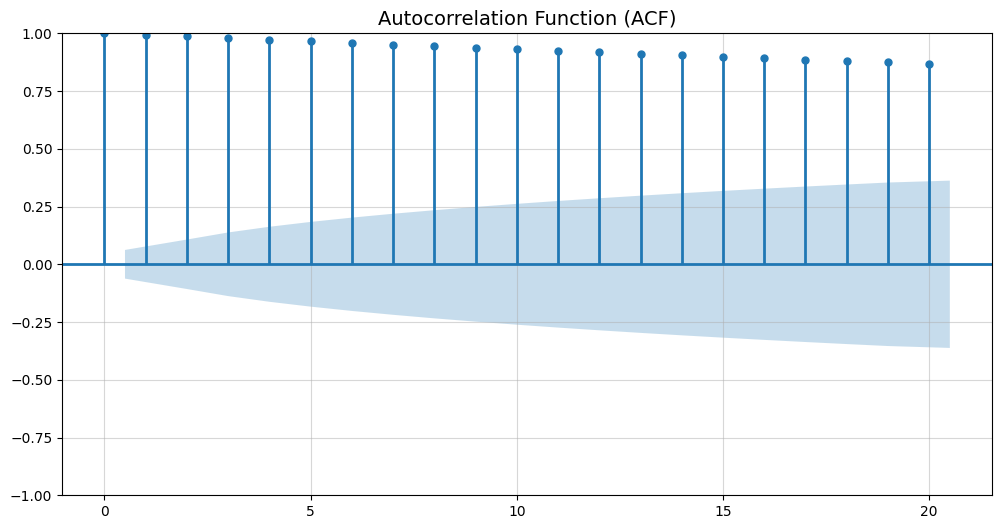

In [19]:
# Plot ACF (AutoCorrelation Function)
plot_acf(train_data['close'], lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()

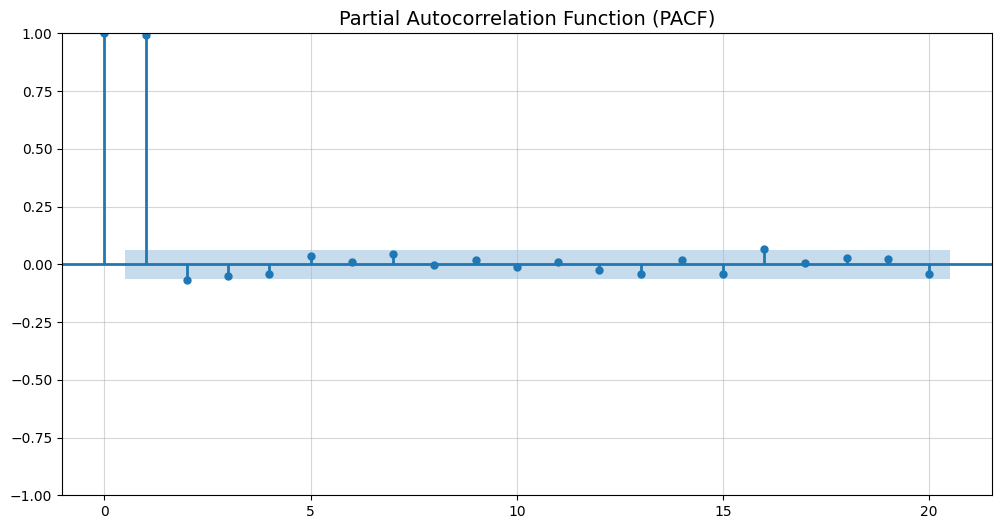

In [20]:
# Plot PACF (Partial AutoCorrelation Function)
plot_pacf(train_data['close'], lags=20, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


- **ACF**: Significant lags decay slowly, indicating the need for a moving average (`q` parameter).
- **PACF**: Significant spikes are observed at lags 1 and 2, suggesting an autoregressive order (`p=2`).

Suggested ARIMA parameters: `(p=2, d=0, q=1)`

### Train the ARIMA Model

Using the determined parameters, we train the ARIMA model on the training dataset.

In [21]:
# Define and fit the ARIMA model
model = ARIMA(train_data['close'].values, order=(2, 0, 1))
model_fit = model.fit()

# Display the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  998
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -987.732
Date:                Thu, 05 Dec 2024   AIC                           1985.463
Time:                        18:16:38   BIC                           2009.992
Sample:                             0   HQIC                          1994.787
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.4949     10.694      3.319      0.001      14.535      56.455
ar.L1          1.4766      0.109     13.574      0.000       1.263       1.690
ar.L2         -0.4776      0.109     -4.394      0.0

## 7. Model Evaluation and Visualization

In this section, we evaluate the performance of the trained ARIMA(2, 0, 1) model using the testing dataset. The key steps include:
1. Forecasting closing prices for the testing period.
2. Calculating evaluation metrics, including Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
3. Visualizing the actual vs. predicted closing prices to assess the model's predictive accuracy.

### Forecasting on Testing Data

Using the trained ARIMA model, we forecast the closing prices for the testing dataset.

In [22]:
# Forecasting using the trained ARIMA model
forecast = model_fit.forecast(steps=len(test_data))

# Add the forecasted values to the testing dataset
test_data['forecast'] = forecast

# Display the first few rows of the testing dataset with predictions
test_data[['close', 'forecast']].head()

,close,forecast
date,,
2019-04-25,24.82,25.312727
2019-04-28,25.12,25.323998
2019-04-29,25.12,25.339337
2019-04-30,25.08,25.356604
2019-05-01,24.89,25.374776


### Evaluation Metrics


To evaluate the model's performance, we compute the following metrics:

- **Mean Absolute Error (MAE):** Measures the average magnitude of the errors.
- **Root Mean Squared Error (RMSE):** Emphasizes larger errors by squaring the deviations.

In [23]:
# Calculate MAE and RMSE
mae = mean_absolute_error(test_data['close'], test_data['forecast'])
rmse = np.sqrt(mean_squared_error(test_data['close'], test_data['forecast']))

# Display the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 3.79
Root Mean Squared Error (RMSE): 4.41


### Visualization: Actual vs Predicted Closing Prices

We visualize the actual and predicted closing prices to assess how well the model captures the trends and fluctuations.

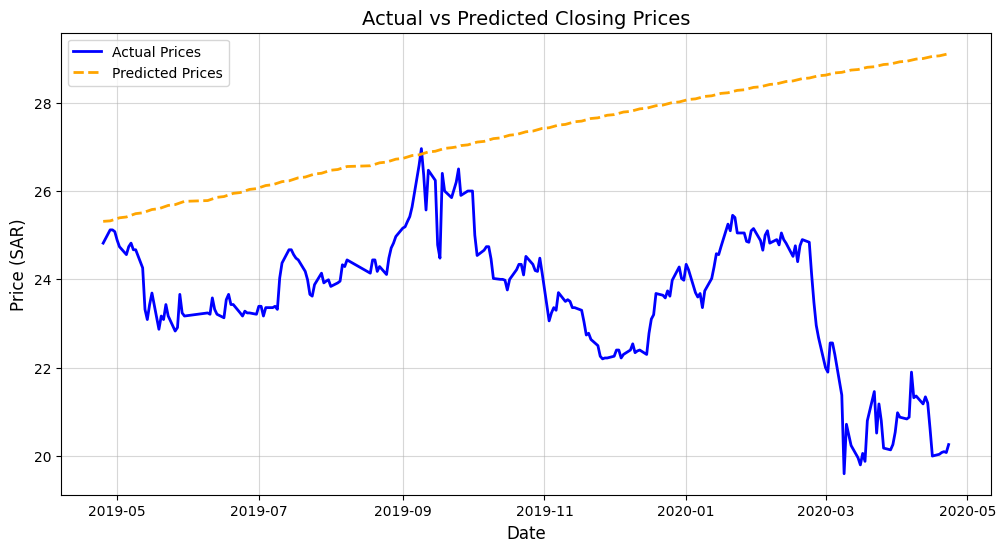

In [24]:
# Plot actual vs predicted closing prices
plt.plot(test_data.index, test_data['close'], label='Actual Prices', color='blue')
plt.plot(test_data.index, test_data['forecast'], label='Predicted Prices', color='orange', linestyle='dashed')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (SAR)')
plt.legend()
plt.show()


   - The predicted prices (orange dashed line) generally follow an upward trend.
   - However, the model fails to capture the high volatility and short-term fluctuations observed in the actual prices (blue line).
   - The gap between the predicted and actual prices increases over time, indicating potential issues with the model's assumptions or parameterization.

#### Performance Summary

- The ARIMA(2, 0, 1) model provides a reasonable baseline for forecasting, effectively capturing long-term trends but struggling with short-term variations.
- Residual non-normality and heteroskedasticity likely impact the accuracy of predictions, especially during volatile periods.


## 8. Conclusion

This project aimed to forecast the closing prices of Saudi Chemical Co.'s stock using the ARIMA(2, 0, 1) model. The analysis involved a comprehensive workflow, including data preprocessing, feature engineering, and model evaluation. The ARIMA model demonstrated its ability to capture general trends in stock prices, with evaluation metrics such as Mean Absolute Error (3.79) and Root Mean Squared Error (4.41) providing a reasonable measure of predictive performance.

However, the model struggled to adapt to short-term fluctuations and periods of high volatility. This limitation can be attributed to the inherent assumptions of the ARIMA model, such as linearity and the inability to account for external factors influencing stock prices. Residual analysis revealed no significant autocorrelation, confirming a good fit for historical data, but deviations from normality and heteroskedasticity suggested potential areas for improvement.

To enhance predictive accuracy, future work could involve exploring advanced models like SARIMA or LSTM networks, which can handle seasonality and non-linear relationships. Additionally, incorporating external features such as economic indicators or market sentiment could improve the model's ability to respond to sudden price changes. Overall, the ARIMA(2, 0, 1) model provides a solid baseline for forecasting, offering valuable insights into general price trends while highlighting opportunities for further refinement.
